## Assignment

The purpose of this assignment is to test that you have met the learning objectives of "Intro to Machine Learning for Water Professionals". In the first three modules of the course we have outlined the "ML workflow" shown in the image below, and put it into practice with common algorithms for classification and regression purposes.

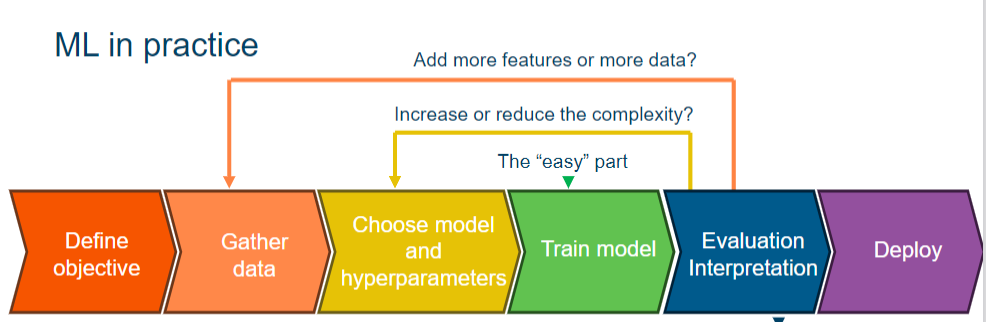

In this assignment you are provided with a large dataset of hydrological data and asked to build a model to predict the average annual discharge of rivers. You will need to proceed iteratively, and gradually improve your model based on what you have learned in the previous iteration.

To simplify your task, we have collected the data for you and we show a first simple iteration. Also, we have split the dataset in training, validation and testing. The validation dataset can be used to compare different algorithms and sets of hyperparameters, and therefore optimize your model. The testing dataset will be used for an unbiased assessment of your model performance. We will not distribute the test labels and we will use them to score and rank your predictions.

There will be two scoring rounds. The first one during module 5 (submission by November 19th) and final one during module 6 (submission by November 26th). More information on the submission and scoring processes will be provided ind due time. You will need to submit your predictions at least once to pass the course and earn your certificate.

Please refer to the text below for more informaition on the avalable data and the problem to be solved. You will receive additional guidance and suggestions in the next live sessions.


**Load libraries and data**

In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load datasets
df_train = pd.read_csv('https://github.com/DHI/Intro_ML_course/raw/main/Assignment/assignment_train.csv')
df_val = pd.read_csv('https://github.com/DHI/Intro_ML_course/raw/main/Assignment/assignment_val.csv')
df_test = pd.read_csv('https://github.com/DHI/Intro_ML_course/raw/main/Assignment/assignment_test.csv')

In [8]:
df_train.shape, df_val.shape, df_test.shape

((30962, 34), (4251, 34), (8966, 33))

As you can imply from the shape of the datasets, the train data contains a much larger number of instances (rivers) than the validation and test subsets. In the image below you can see the grographical distribution of instances (gray = train, blue = val, orange = test). You can also notice that the three subsets are randomly distributed across the planet, but we don't use instances from the same river basin in separate subsets. This would contaminate the subsets, as rivers from the same basin are expected to have very similar behaviour.

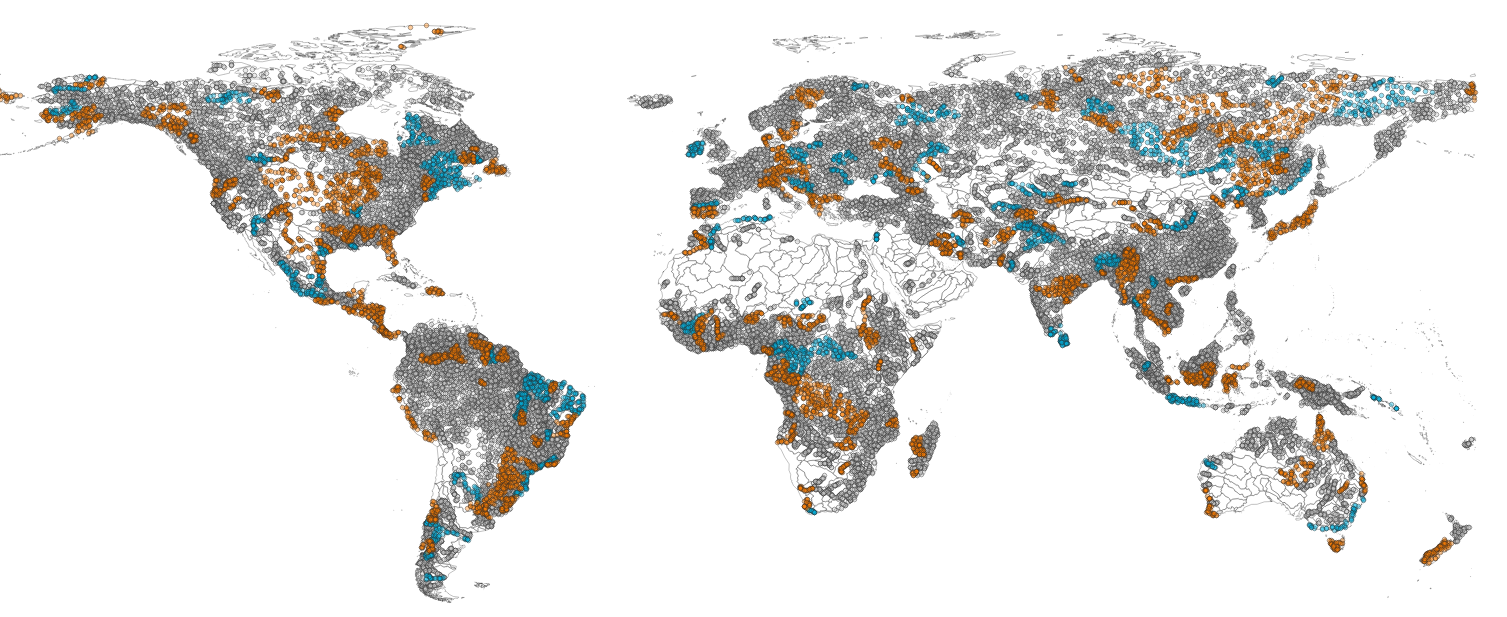

**Explanation of features**

The target variable is the average annual discharge express in m3/s ('dis_m3_pyr'). Two of the input features are derived from the HydroRIVERS database (https://www.hydrosheds.org/products/hydrorivers), the remaining from the RiverAtlas database (https://www.hydrosheds.org/hydroatlas). Please refer to this catalog for a detailed explanation of the RiverAtlas features (https://github.com/DHI/Intro_ML_course/blob/main/Assignment/RiverATLAS_Catalog_v10.pdf).

In [9]:
'''
## Target variable
'dis_m3_pyr', # Average annual discharge in m3/s

## Input variables from HydroRIVERS
'DIST_UP_KM', # River length to outlet in km
'UPLAND_SKM', # Drainage area in km2

## Input variables from RiverAtlas
# Coordinates
'lon', 'lat',
# Hydrology
'inu_pc_umx', 'lka_pc_use', 'lkv_mc_usu', 'gwt_cm_cav',
# Physiography
'ele_mt_cav', 'ele_mt_uav', 'slp_dg_cav', 'slp_dg_uav',
# Climate
'tmp_dc_cmx', 'tmp_dc_cmn', 'pre_mm_uyr', 'pet_mm_uyr', 'aet_mm_uyr', 'ari_ix_uav', 'cmi_ix_uyr', 'snw_pc_uyr',
# Land cover
'for_pc_use', 'crp_pc_use', 'pst_pc_use', 'gla_pc_use',
# Soils
'cly_pc_uav', 'slt_pc_uav', 'snd_pc_uav', 'soc_th_uav', 'swc_pc_uyr',
# Anthropogenic
'ppd_pk_cav', 'ppd_pk_uav', 'gdp_ud_cav', 'hdi_ix_cav'
'''

"\n## Target variable\n'dis_m3_pyr', # Annual discharge in m3/year\n\n## Input variables from HydroRIVERS\n'DIST_UP_KM', # River length to outlet in km\n'UPLAND_SKM', # Drainage area in km2\n\n## Input variables from RiverAtlas\n# Coordinates\n'lon', 'lat',\n# Hydrology\n'inu_pc_umx', 'lka_pc_use', 'lkv_mc_usu', 'gwt_cm_cav',\n# Physiography\n'ele_mt_cav', 'ele_mt_uav', 'slp_dg_cav', 'slp_dg_uav',\n# Climate\n'tmp_dc_cmx', 'tmp_dc_cmn', 'pre_mm_uyr', 'pet_mm_uyr', 'aet_mm_uyr', 'ari_ix_uav', 'cmi_ix_uyr', 'snw_pc_uyr',\n# Land cover\n'for_pc_use', 'crp_pc_use', 'pst_pc_use', 'gla_pc_use',\n# Soils\n'cly_pc_uav', 'slt_pc_uav', 'snd_pc_uav', 'soc_th_uav', 'swc_pc_uyr',\n# Anthropogenic\n'ppd_pk_cav', 'ppd_pk_uav', 'gdp_ud_cav', 'hdi_ix_cav'\n"

**Iteration 0**

This is the simplest regression model we can build to predict the target variable given only two input features. Your goal is to iteratively improve the performance of this model while finding a good tradeoff between bias and variance.

When you are happy with your result, you should apply your trained model to make predictions for the test dataset. Notice that you are not provided with the test labels, so you are not able to assess the model performance on the test data. We will do that for you and return a quantitative feedback. Make sure the test predictions you share with us are expressed in the original measuring unit and scale.

We will provide instructions on the submission of the test predictions in module 5.

In [17]:
# Define the features (X) and the target variable (y) for training data
X_train = df_train[['UPLAND_SKM', 'DIST_UP_KM']]
y_train = df_train['dis_m3_pyr']

# Define the features (X) and the target variable (y) for validation data
X_val = df_val[['UPLAND_SKM', 'DIST_UP_KM']]
y_val = df_val['dis_m3_pyr']

# Define the features (X) for testing data
X_test = df_test[['UPLAND_SKM', 'DIST_UP_KM']]


In [21]:
# Initialize linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the validation data
y_val_pred = model.predict(X_val)

# Calculate the RMSE for the validation data
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f"RMSE validation: {rmse} m3/s")

RMSE validation: 2453.141787483231 m3/s


In [35]:
# Predict the target variable for the testing data
y_test_pred = model.predict(X_test)

# Export the predictions as a CSV file
pd.DataFrame(y_test_pred).to_csv("assignment_test_predictions.csv", index=False, header=False) # be mindful of where the file is saved

**Iteration 1**

It's your turn now!